### Images

#### 1. Image file

**1.1 Image file**
- Digital image는 화소(pixel)이라고 부르는 점들의 색과 밝기를 지정해서 표현한다.
- 각 pixel은 밝기를 지정하는 0에서 255까지, 266개의 값으로 구성된다. 숫자가 커질수록 더 밝은 점이 된다.
- Python에선 int를 사용할 경우 0-255, float을 사용하면 [0,1] scale로 해석한다.
- 흑백사진의 경우 각 pixel 당 밝기를 결정하는 하나의 숫자, 컬러사진은 빛의 삼원색인 Red, Green, Blue 각각의 밝기를 조합하여 색을 만든다.

**1.2  Resolution**
- 화질을 표시하는 해상도(resolution)는 2.51cm 안에 들어있는 화소의 수를 기준으로 PPI (pixels per inch)나 DPI ( ink dots per inch)로 표시한다.
- 화소수가 많다고 화질이 좋아지는 것은 아니고 화질이 좋기 위해서 화소수가 많아야 한다.

**1.3  Color depth**
- 색을 구분하는 단계로 보통 삼원색의 상대적인 밝기에 따라 색상이 정해진다.
- True color (24 bit)은 각 색을 256단계로 구분하므로 $256×256×256=(2^8)3=2^{24}=16,777,216$ 가지 색상을 표현할 수 있다.
- 5 bit 까지는 사전에 지정한 palette을 사용하며 8 bit 이상은 RGB의 단계를 조정해 색을 표현한다.
- 보통 인간이 구분할 수 있는 색은 일천만가지 정도라고 알려져 있다.

#### 2. Example

**2.1 read files**

Internet 상의 image를 사용할 때 URL로 image를 직접 읽는 것은 지원을 하지 않으므로 다음과 같이 URL을 열고 내용을 읽어야 한다.

In [1]:
from PIL import Image, ImageFilter
import urllib.request

url = 'https://raw.githubusercontent.com/k5yi/econ2005/master/datasets/%EC%8B%9C%EC%95%84.png'
im = Image.open(urllib.request.urlopen(url))

예제로 사용한 고양이 사진은  256×256  크기의 사진이다. local folder에선 imread로 image file을 array로 직접 변환해 사용할 수 있다

In [3]:
import matplotlib.image as mpimg

img = mpimg.imread(r'filename.png')

**2.2 Pillow.Image module**

생성한 image object는 다양한 method들이 정의되어 있다

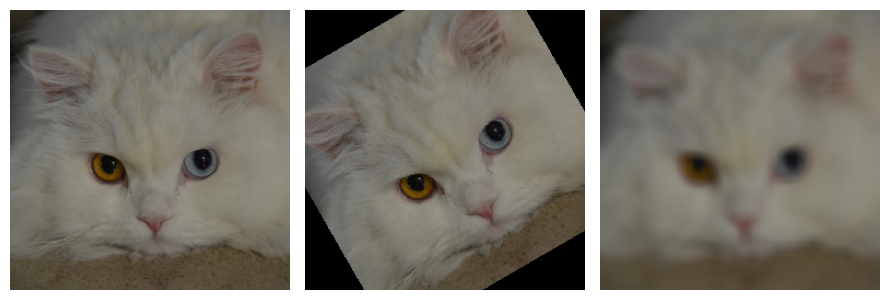

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(9,4))
ax[0].imshow(im)
ax[1].imshow(im.rotate(30)) # rotate
ax[2].imshow(im.filter(filter = ImageFilter.BoxBlur(5))) # filter
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.tight_layout()

#### 3. Homeworks

이 과제에선 Numpy를 이용하여 위 예시의 작업을 처리하는 code를 직접 작성해 본다. image의 pixel 정보를 numpy로 수정하기 위해선 image file을 array로 변환해야 한다.

예제의 사진을 array로 변환하면 shape이 (width, height, depth) = (256, 256, 3)가 된다.

총 pixel의 수는 width와 height의 곱인 65,536( $2^8×2^8$ )개이고 RGB의 밝기를 마지막 축의 3개 숫자로 지정한다.

(256, 256, 3)
pixel value range 40 221


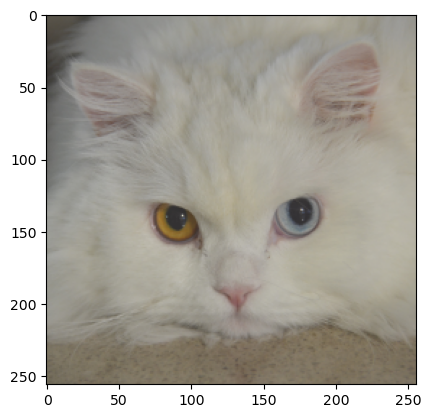

In [6]:
import numpy as np

img = np.array(im)+40
print(img.shape)
print('pixel value range', np.min(img), np.max(img))
plt.imshow(img);

**3.1 Invert Image**

RGB에 지정된 Pixel의 밝기를 (255-x)와 같이 반대로 만드는 함수를 만든다.

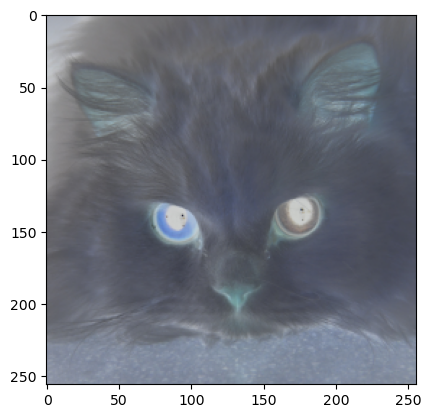

In [7]:
from homework2 import invert_image

invert_image(img)
plt.show()

**3.2 Grayscale Image**

일정 밝기 이상의 pixel은 가장 밝게하고 '흰색(255)'으로 처리하고 이외 pixel은 '검정색(0)'으로 바꿔준다.

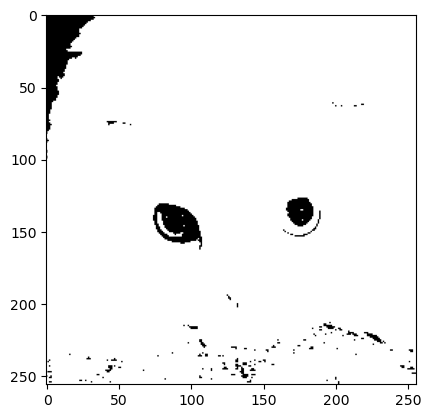

In [14]:
from homework2 import boundary

boundary(img, cutoff = 100)
plt.show()

**3.4 Flip Image**

image를 반전하는 함수를 만든다. Pixel의 위치를 기준에 맞게 다시 정렬하면 된다

Text(0.5, 1.0, 'flipped vertically')

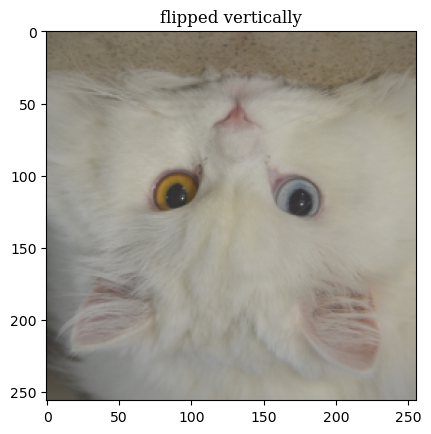

In [16]:
from homework2 import flip

flip(img, by = 'vertical')
plt.title('flipped vertically', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'flipped horizontally')

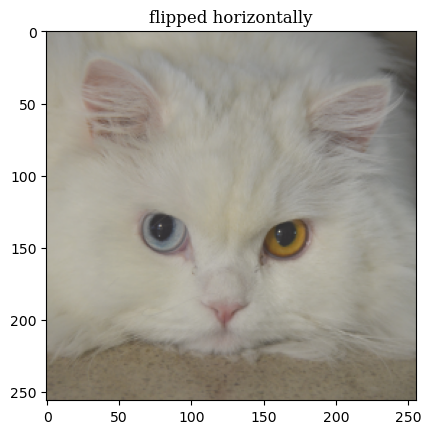

In [18]:
flip(img, by = 'horizontal')
plt.title('flipped horizontally', fontfamily = 'Serif', fontsize = 12)

**3.5 Padding**

padding은 image뿐아니라 자연어, 시계열자료 등 다양한 분야에서 사용한다.
image의 위아래와 좌우에 흰색으로 테를 두르는 함수를 만든다.
padding_size는 위/아래, 왼쪽/오른쪽의 테두리 크기이다.
padding을 한 결과물의 shape은 (width+2×padding_size,height+2×padding_size,depth)이다

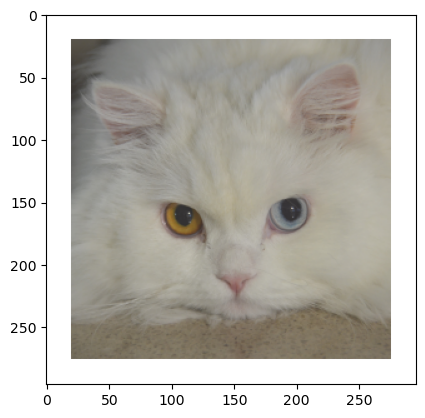

In [19]:
from homework2 import padding

padding(img, padding_size = 20, pad = 255)

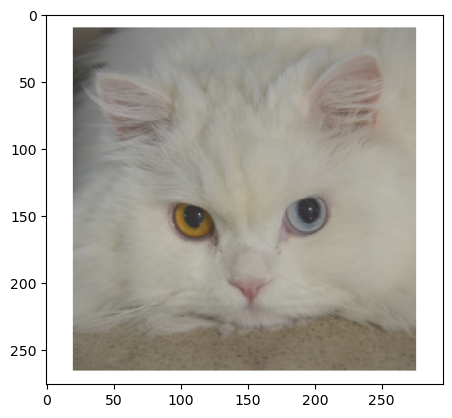

In [20]:
padding(img, padding_size = (10,20), pad = 255)

**3.6 Blur**

kernel이라고 부르는  $k×k$  인 array를 만들어 대상 이미지의  $k^2$ 개 pixel 밝기의 평균을 이용하여 이미지를 흐리게 만드는 과정이다

원본 image와 같은 크기의 image를 결과물로 얻으려면 필터 절반의 크기로 padding한다. Width나 height가 짝수이면 1/2, 홀수이면 (k-1)/2 을 사용한다. pad 값이 255이면 테두리는 평균보다 밝게 된다. 이 문제를 피하려면 테두리의 pad 값을 가장 가까운 pixel의 pad값으로 바꾸는 것도 한 방법이다.

왼쪽 위부터 시작해 kernel을 순서대로 적용하여 계산한 평균값을 이용하여 새로운 이미지를 만든다. Kernel의 왼쪽 위 cell과 겹쳐지는 부분의 index를 이용해 새로운 이미지를 구성한다.

평균을 구해 흐리게 할 때는 정수로 변환하여 저장한다. kernel에 겹치는 값 중 가장 큰 값을 사용한다.

kernel_size는 홀수로 하는 것이 작업하기 편리하다. method는 'mean'과 'max', 'min'이 가능하도록 code를 만든다.

**3.7  filter**

Filter란 보통 사각형의 window로 matrix로 표현한다. Filter로 convolution을 계산하여 image의 특징을 표현하는데 사용한다.

원본 image와 같은 크기의 image를 결과물로 얻으려면 필터 절반의 크기로 padding한다. Width나 height가 짝수이면 1/2, 홀수이면 (k-1)/2 을 사용한다. Filter를 움직여가면서 convolution (element-wise multiplication한 결과를 더해준 것) 으로 만든 것을 feature map이라고 부른다.

적당한 크기의 padding을 적용한다. 모든 pixel에 대해 filter를 적용한 convolution을 계산하여 새로운 image를 만든다.

답안에 사용한 방법은 np.matmul이지만 다른 방법으로도 계샇할 수 있다. Bluring과는 다르게 filtering에선 filter의 크기가 홀수이어야 한다.

과제 3.6의 blur는 filter의 특별한 경우이다.

**3.8 Rotate image**

image를 회전시키는 함수를 만든다. 12시 방향을 기준으로 시계방향으로 각도를 해석하여 회전시킨다.

Width와 height를 2배로 늘여 회전시킨 사진 전체가 보이도록 한다.

테두리는 원하는 색을 사용한다. 아래 예에선 무색(255)으로 지정하였다.

정수의 조합에만 pixel을 지정할 수 있으므로 변환한 좌표를 정수로 변환하면 동일한 좌표가 반복될 수 있다. 회전한 image에 왜곡이 발생한다.

Mapping을 일괄적으로 처리하기 어려우므로 loop를 사용해야 한다. 해상도를 높이고 interplation으로 빈 자리를 채우면 어느정도 보정이 가능하다.

**3.9 match image**

Image에서 원하는 부분을 식별하는 작업이다. 128×128  크기의 image에서  12×12 의 image를 찾고 싶다면 원하는 image, 즉 target image와 크기가 동일한  117×117 개의 template을 만들어 target의 값들과 비교하는 것이다

1. 대상 image에서 찾고자 하는 부분으로 targer image를 만든다.
2. Target의 값들을 standarize한다.
3. 각 template의 값들을 standarize한다.
4. target과 template값들의 상관계수를 계산한다.
5. 상관계수의 값이 가장 큰 template을 선택한다.